In [320]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use(['dark_background'])
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})

In [321]:
df=pd.read_excel(r"C:\Users\Aayush Kandpal\Desktop\PRojects_Freelance\october_1\1634006182-sce.xlsx")

In [322]:
df.head()

,Date,Load,temp
0,2014-01-01 00:00:00,9891.0,59.4685
1,2014-01-01 01:00:00,9553.0,61.4030
2,2014-01-01 02:00:00,9222.0,55.0310
3,2014-01-01 03:00:00,9024.0,53.1878
4,2014-01-01 04:00:00,8987.0,51.9944


In [323]:
def mean_absolute_percentage_error(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return 100*np.mean(np.abs((y-y_pred)/y))

In [324]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['day of week'] = df['Date'].dt.dayofweek
df.head()

,Date,Load,temp,year,month,day,hour,day of week
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2


In [325]:
# df.columns[3:]

In [326]:
# Treating the columns month,day,hour,day of week as categories
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['month']=le.fit_transform(df['month'])
df['day']=le.fit_transform(df['day'])
df['hour']=le.fit_transform(df['hour'])
df['day of week']=le.fit_transform(df['day of week'])

In [327]:
# Splitting data into train and test as specified Task 7
train=df[df['year']!=2019]
test=df[df['year']==2019]

In [328]:
df.shape

(49680, 8)

In [329]:
train.shape,test.shape

((43824, 8), (5856, 8))

In [330]:
from sklearn.linear_model import LinearRegression
x=df.drop(['Date','Load'],axis=1)
y=df['Load']

x_train=train.drop(['Date','Load','temp'],axis=1)
y_train=train['Load']

x_test=test.drop(['Date','Load','temp'],axis=1)
y_test=test['Load']

In [331]:
# Task 1
lr=LinearRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)
print(f"MAPE is :{mean_absolute_percentage_error(y_test,pred1)} %")
print(f"R-Squared value is :{r2_score(y_test,pred1)}")

MAPE is :12.343149791147221 %
R-Squared value is :0.338266591739083


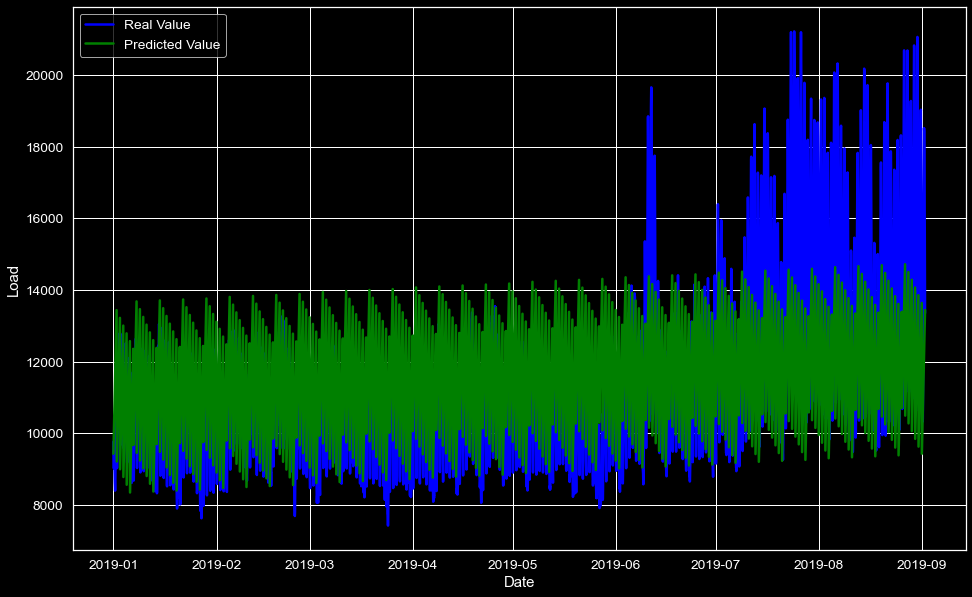

In [332]:
sns.lineplot(test['Date'],y_test,color='blue',label='Real Value')
sns.lineplot(test['Date'],pred1,color='green',label='Predicted Value')

Text(0, 0.5, 'Load')

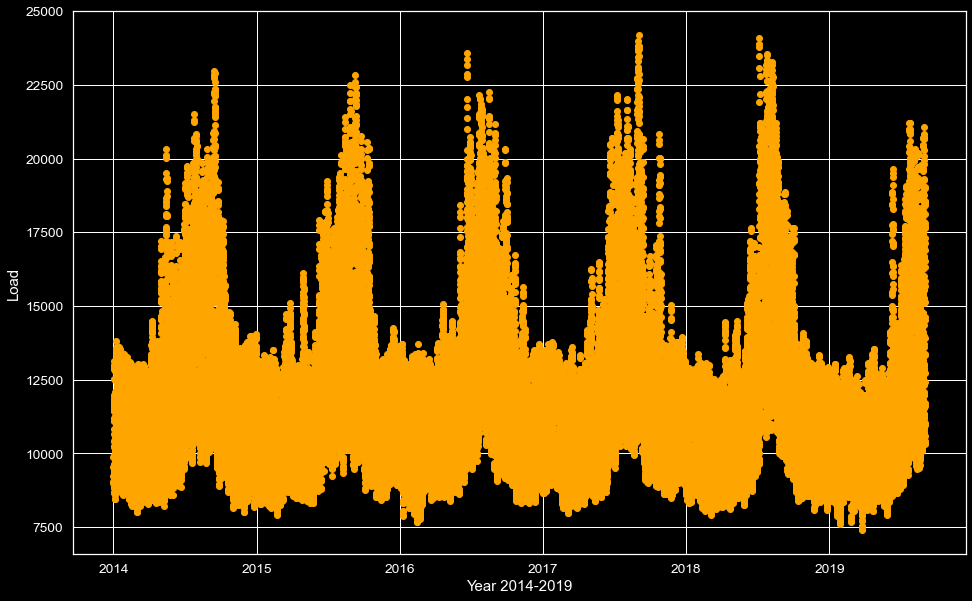

In [316]:
# Task 2
plt.scatter(x=df['Date'],y=df['Load'],color='orange')
plt.xlabel("Year 2014-2019")
plt.ylabel("Load")

In [333]:
# Task 3
from sklearn.preprocessing import PolynomialFeatures
quad=np.polyfit(train['temp'],y_train,2)

In [334]:
# The quadratic relationship between Load and Temp
quad

array([ 3.27933660e+00, -3.33705234e+02,  1.91800306e+04])

In [335]:
y_quad_test=3.31634408*(test['temp'])**2 -3.36903962*100*(test['temp']) + 1.91697*10000

MAPE is :14.269767136632105 %
R-Squared value is :0.281613708736125
We can see that by using only temp also we are bale to achieve a MAPE of about 14 %. Hence it can be said that 
using a quadratic function of temp is also a good predictor and should be added to the model


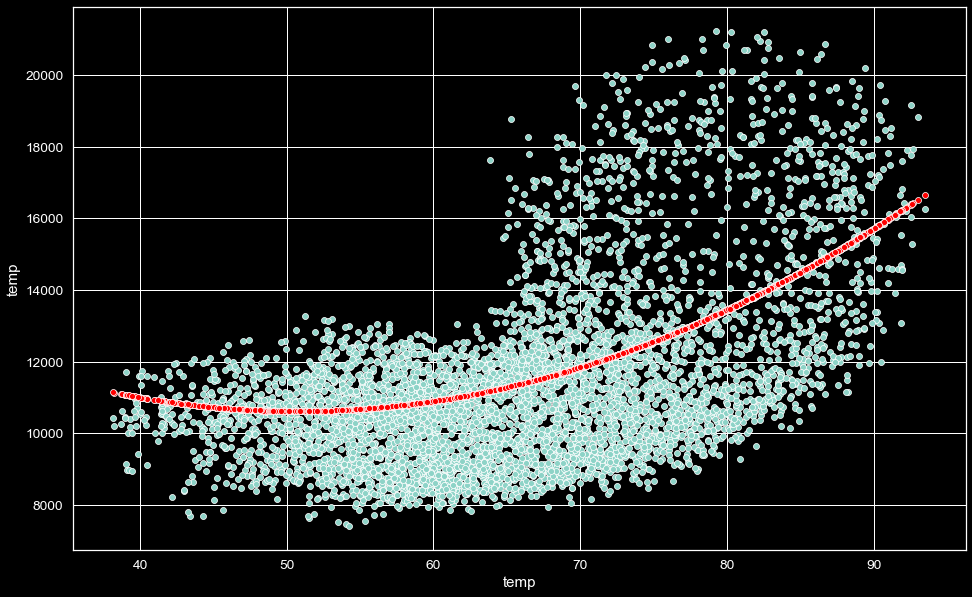

In [336]:
sns.scatterplot(x=test['temp'],y=test['Load'])
sns.scatterplot(x=test['temp'],y=y_quad_test,color='red')
print(f"MAPE is :{mean_absolute_percentage_error(y_test,y_quad_test)} %")
print(f"R-Squared value is :{r2_score(y_test,y_quad_test)}")
print("We can see that by using only temp also we are bale to achieve a MAPE of about 14 %. Hence it can be said that \n"
      "using a quadratic function of temp is also a good predictor and should be added to the model")

In [337]:
# Task 4
# Adding temp, temp^2, interaction of temperature and hour, interaction of squared temp and hour as a feature
x_train1=train.drop(['Load','Date'],axis=1)
x_test1=test.drop(['Load','Date'],axis=1)
x_train1['square_temp']=x_train1['temp']**2
x_test1['square_temp']=x_test1['temp']**2

x_train1['interaction_1']=x_train1['temp']*x_train1['hour']
x_test1['interaction_1']=x_test1['temp']*x_test1['hour']

x_train1['interaction_2']=x_train1['square_temp']*x_train1['hour']
x_test1['interaction_2']=x_test1['square_temp']*x_test1['hour']

MAPE is :11.122576687423681 %
R-Squared value is :0.4732498274170075


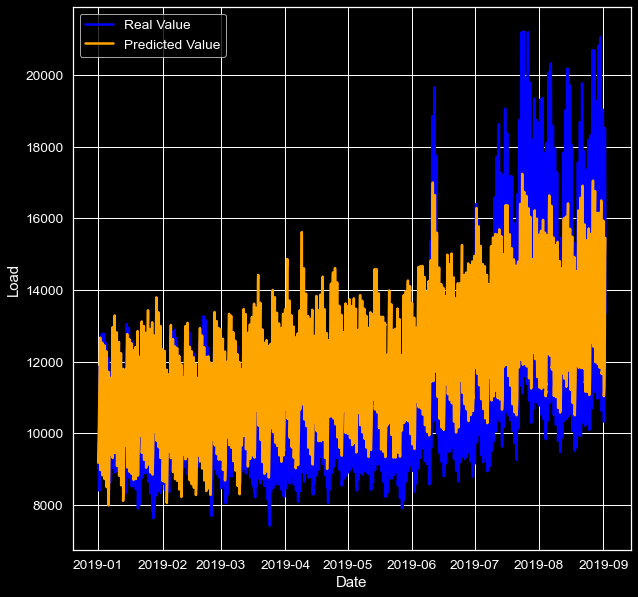

In [338]:
lr.fit(x_train1,y_train)
pred2=lr.predict(x_test1)
print(f"MAPE is :{mean_absolute_percentage_error(y_test,pred2)} %")
print(f"R-Squared value is :{r2_score(y_test,pred2)}")
plt.figure(figsize=(10,10))
sns.lineplot(test['Date'],y_test,color='blue',label='Real Value')
sns.lineplot(test['Date'],pred2,color='orange',label='Predicted Value')
plt.show()

In [339]:
# Task 5
x_train1['lag24']=train['Load'].shift(24)
x_test1['lag24']=test['Load'].shift(24)

x_train1=x_train1.fillna(0)
x_test1=x_test1.fillna(0)
# Due to shift 24 initial value will becomed not defined in the new lag feature. Replacing those value with zeroes.

MAPE is :4.9255749481579425 %
R-Squared value is :0.8695552120082454


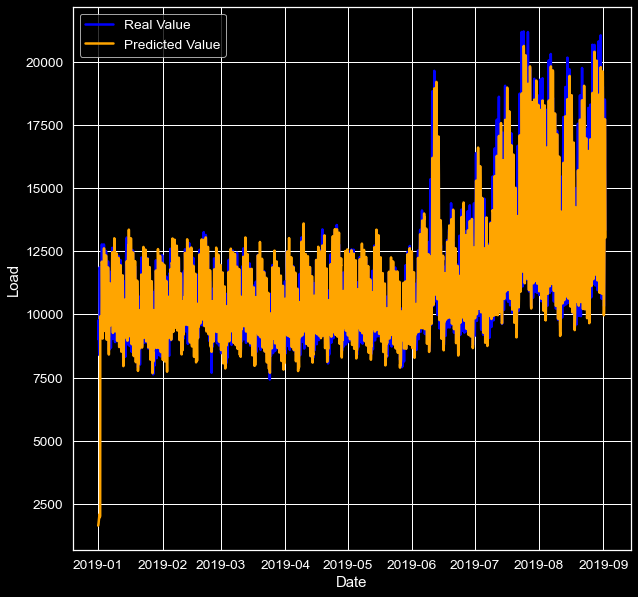

In [341]:
lr.fit(x_train1,y_train)
pred3=lr.predict(x_test1)
print(f"MAPE is :{mean_absolute_percentage_error(y_test,pred3)} %")
print(f"R-Squared value is :{r2_score(y_test,pred3)}")
plt.figure(figsize=(10,10))
sns.lineplot(test['Date'],y_test,color='blue',label='Real Value')
sns.lineplot(test['Date'],pred3,color='orange',label='Predicted Value')
plt.show()

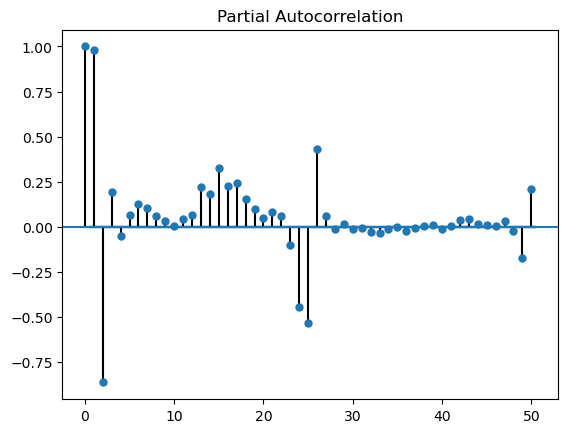

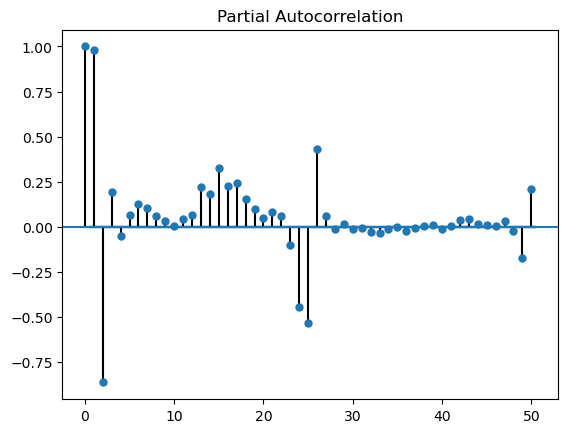

In [347]:
# Task 6
plt.rc("figure", figsize=(16,10))
plt.style.use(['default'])
sm.graphics.tsa.plot_pacf(df['Load'], lags = 50)


In [209]:
# After observing the pacf graph, there are many lags with significant relation with the final output. Assuming a threshold of 0.25.
# We will add features with all lags that have values less than orgreater than 0.25
# Task 7. Train test split has been made by putting all values from 2019 in test and remaining in train. Find above.

In [348]:
# Creating new lag features
# Task 8
x_train1['lag1']=train['Load'].shift(1)
x_test1['lag1']=test['Load'].shift(1)

x_train1['lag2']=train['Load'].shift(2)
x_test1['lag2']=test['Load'].shift(2)

x_train1['lag15']=train['Load'].shift(15)
x_test1['lag15']=test['Load'].shift(15)

x_train1['lag17']=train['Load'].shift(17)
x_test1['lag17']=test['Load'].shift(17)

x_train1['lag25']=train['Load'].shift(25)
x_test1['lag25']=test['Load'].shift(25)

x_train1['lag26']=train['Load'].shift(26)
x_test1['lag26']=test['Load'].shift(26)

x_train1['lag49']=train['Load'].shift(49)
x_test1['lag49']=test['Load'].shift(49)

x_train1['lag50']=train['Load'].shift(50)
x_test1['lag50']=test['Load'].shift(50)

x_train1=x_train1.fillna(0)
x_test1=x_test1.fillna(0)
# The nan values have been replaced with zeroes.

MAPE is :0.938783352218631 %
R-Squared value is :0.9911319880940074


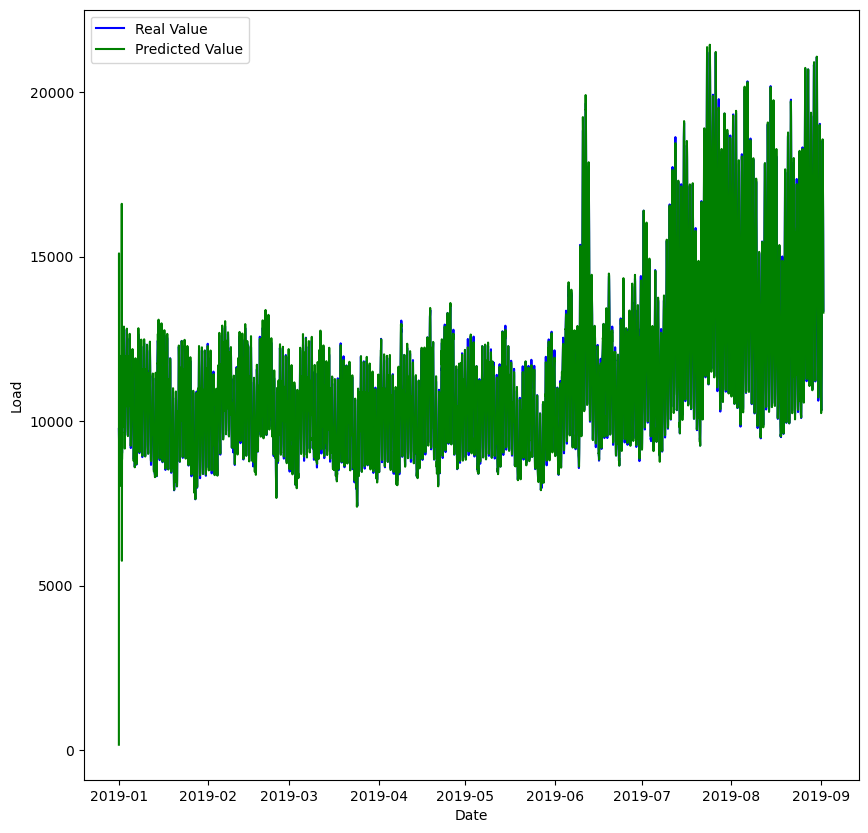

In [349]:
lr.fit(x_train1,y_train)
pred4=lr.predict(x_test1)
print(f"MAPE is :{mean_absolute_percentage_error(y_test,pred4)} %")
print(f"R-Squared value is :{r2_score(y_test,pred4)}")
plt.figure(figsize=(10,10))
sns.lineplot(test['Date'],y_test,color='blue',label='Real Value')
sns.lineplot(test['Date'],pred4,color='green',label='Predicted Value')
plt.show()

In [350]:
train['month_sum']=train.groupby(['year','month'])['Load'].cumsum()

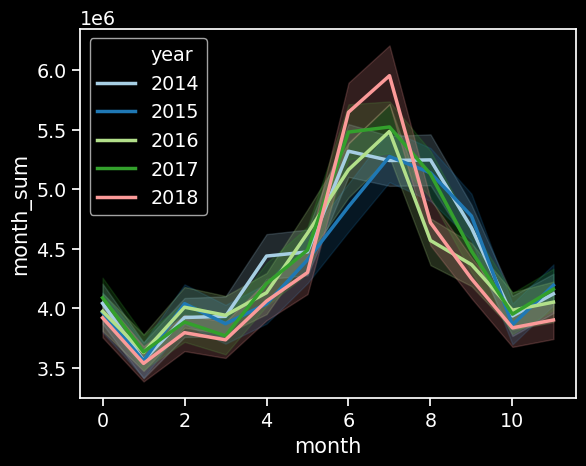

In [351]:
plt.style.use(['dark_background'])
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
palette = sns.color_palette("Paired",5)
sns.lineplot(data=train,x="month",y="month_sum",hue="year",palette=palette,err_style="band")